#### The effectiveness measure is an easy and quick measure to evaluate the models’ efficacy and compare them quickly. Here, we deal with the accuracy and time as numbers in this measurement and ignore their units. To make the comparison as reasonable as possible, we must first scale the comparison’s parameters.

### (1)
#### The accuracy values are scaled using the following equation:
  
  A (%) = ($x_i/\sum\limits_{i=1}^{i} x_i$) x 100

* where $x$ is the model accuracy and

* $i$ is the model’s number.

In [1]:
ka = [32.95, 44.42, 48.84, 81.79, 84.63, 60.51, 89.71, 95.69, 98.63] #models' accuracy

s = sum(ka)
ratios = []

for i in range(len(ka)):
    ratio = ka[i] / s
    # print(acc[i])
    ratios.append(ratio*100)

print('A = ', ratios) # ==A


A =  [5.171304361473391, 6.97145188882088, 7.665144309995764, 12.836448671469155, 13.28216959367202, 9.496680634681482, 14.07944504606306, 15.017970086476137, 15.479385407348117]


### (2)
#### After that, because the execution time should be short and the accuracy should be high, the relationship between them is reciprocal, so the following equation accomplishes this relationship:

  $t_i$ = $1/T_i$

* where $t$ is the reciprocal relationship of the execution time $T$.



In [2]:
t = [0.28, 0.52,	0.61, 0.73, 0.55, 0.8, 1.02, 0.56, 0.54]
vt = []
for j in range(len(t)):
    ratio = 1/t[j]
    # print(acc[i])
    vt.append(ratio)

print('t_i = ',vt)

t_i =  [3.571428571428571, 1.923076923076923, 1.639344262295082, 1.36986301369863, 1.8181818181818181, 1.25, 0.9803921568627451, 1.7857142857142856, 1.8518518518518516]


#### Now the scaling time can be taken as follows:

  B (%)= ($t_i/\sum\limits_{i=1}^{i} t_i$) x 100



In [3]:
s_vt = sum(vt)
t_ratios = []

for i in range(len(vt)):
    ratio = vt[i] / s_vt
    t_ratios.append(ratio*100)

print('B = ',t_ratios)


B =  [22.059672791433886, 11.878285349233632, 10.125751445248344, 8.461244358358204, 11.230378875639072, 7.720885477001861, 6.055596452550479, 11.029836395716943, 11.438348854817573]


### (3)
#### Finally, after scaling the accuracy values and time, the percent of linear combination can be calculated for A and B as follows:

$P = (α×A)+(γ×B)$,

 where  $α+γ \approx\ 100%$

where $P$ represents the standard measurement evaluation between the models according to their accuracy $A$ and time $B$ , $α$ is the significance coefficient for accuracy, $γ$ is the significance coefficient for time, and $α$ and $γ$ values are between $zero$ and $one$.

In [4]:
a = 0.7   # == α
y = 1- a   # == γ
p = []
for i in range(len(ka)):
    pi = (a * ratios[i]) + (y * t_ratios[i])
    # print(pi[i])
    p.append(pi)

print('P = ', p)
print(sum(p))

P =  [10.23781489046154, 8.443501926944705, 8.403326450571539, 11.52388737753587, 12.666632378262136, 8.963942087377596, 11.672290468009287, 13.821529979248378, 14.267074441588953]
100.0


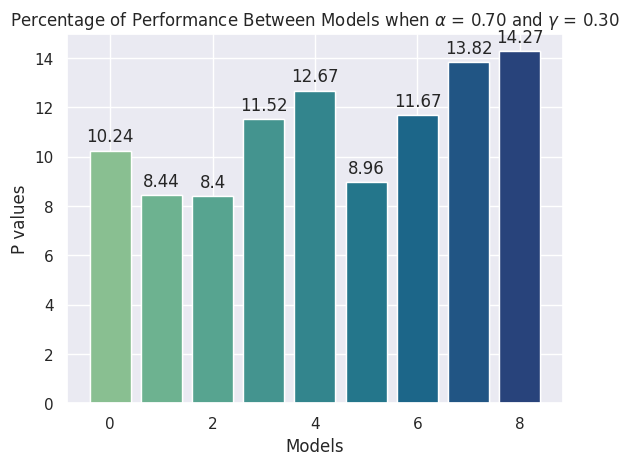

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



s_p = sum(p)
p_ratios = []


sns.set()

p_ratios = [ratio/s_p * 100 for ratio in p]

palette = sns.color_palette("crest", len(p_ratios))  #tab20c, tab20b, crest, mako
bars = plt.bar(range(len(p_ratios)), p_ratios, color=palette)

# Plotting the p_ratios
plt.bar(range(len(p_ratios)), p_ratios, color=palette)
plt.xlabel('Models')
plt.ylabel('P values')
plt.title(f'Percentage of Performance Between Models when $α$ = {a:.2f} and $γ$ = {y:.2f}')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')  # Adjust 0.2 if needed to position the label appropriately

plt.show()


## Citation
### We would appreciate a citation to the original paper if you use this code in your research works.
```
{
  @ARTICLE{10253958,
  author={Al-Alimi, Dalal and Cai, Zhihua and Al-qaness, Mohammed A. A.},
  journal={IEEE Transactions on Geoscience and Remote Sensing},
  title={FHIC: Fast Hyperspectral Image Classification Model Using ETR Dimensionality Reduction and ELU Activation Function},
  year={2023},
  volume={61},
  number={},
  pages={1-17},
  doi={10.1109/TGRS.2023.3314619}}
}
```